In [1]:
!pip install folium
!pip install geopy
!pip install opencage
!pip install geopandas
!pip install cartopy


   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ------- ------------------------------- 20.5/110.5 kB 330.3 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/110.5 kB 393.8 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/110.5 kB 563.7 kB/s eta 0:00:01
   -------------------------------------- 110.5/110.5 kB 716.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 393.8 kB/s eta 0:00:01
   ---------------------------------- --- 112.6/125.4 kB 939.4 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00
   --------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import unicodedata
import os
import geopandas as gpd
from opencage.geocoder import OpenCageGeocode
import folium
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from folium.plugins import HeatMap

# Funções

In [3]:
# Normaliza um texto
def norm(texto):
    texto = texto.lower()
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join([c for c in texto if not unicodedata.combining(c)])
    texto = texto.replace('ç', 'c')
    texto = texto.replace(' ', '_')
    texto = ''.join(e for e in texto if e.isalnum() or e == '_')
    return texto

# Cria uma tabela simples com cor no headline e no index
def imgsimples(df, nome, titulo):
    # Cria uma figura e um eixo
    fig, ax = plt.subplots(figsize=(8, 8))  # Ajuste o tamanho conforme necessário
    # Adiciona um título acima da tabela
    fig.suptitle(titulo, fontsize=14, weight='bold', y=0.95)  # Ajuste a posição com 'y'

    # Remove os eixos
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Adiciona a tabela ao gráfico
    tbl = table(ax, df, loc='center', cellLoc='left', colWidths=[0.2]*len(df.columns))

    # Ajusta o tamanho da fonte
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)

    # Personaliza as cores
    colors = {
        'index': '#ff9999',  # Cor do índice
        'header': '#66b3ff',  # Cor do cabeçalho
    }

    # Aplica a cor ao cabeçalho
    for key, cell in tbl.get_celld().items():
        if key[0] == 0:  # Células do cabeçalho
            cell.set_text_props(weight='bold', fontsize='7')
            cell.set_facecolor(colors['header'])
        elif key[1] == -1:  # Células do índice
            cell.set_facecolor(colors['index'])

    savename = cidade.replace(' ', '_')
    # Salva a imagem
    plt.savefig(f'{nome}_{cidadenorm}.png', bbox_inches='tight', pad_inches=0.3)

    # Exibe a imagem (opcional)
    plt.show()

#Cria uma pasta na origem
def mkd(nome_pasta):
    if not os.path.exists(nome_pasta):
        os.makedirs(nome_pasta)
        print(f"Pasta '{nome_pasta}' criada com sucesso.")
    else:
        print(f"A pasta '{nome_pasta}' já existe.")


#### Geolocalizador 
# API KEY, DEVE SER MUDADO PARA EVIRON

GEOAPI_KEY = 'f8c08d488b9c45588b1dcad65de8b2d4'

key = GEOAPI_KEY
geocoder = OpenCageGeocode(key)
def geo(address):
    result = geocoder.geocode(address)
    if result:
        return result[0]['geometry']['lat'], result[0]['geometry']['lng']
    else:
        return None, None
    

# Carregando dados

In [4]:
# Obtendo o diretório atual
workspace = os.getcwd()

### NOME DO ARQUIVO DO TSE ##############
tsearquivo = "bweb_1t_RJ_181120201549.csv" ## ESSE ARQUIVO É MUITO GRANDE PARA ESTAR NO GITHUB
##########################################

tsearq = os.path.join(workspace, tsearquivo)


# Especificar o encoding como 'latin1'
votos = pd.read_csv(tsearq, encoding='latin1', sep=';')
votos = votos.drop(['DS_ELEICAO', 'NR_TURNO', 'DT_PLEITO', 'CD_PLEITO', 'NM_TIPO_ELEICAO', 'CD_TIPO_ELEICAO', 'ANO_ELEICAO', 'HH_GERACAO', 'DT_GERACAO', 'CD_ELEICAO', 'CD_MUNICIPIO', 'CD_CARGO_PERGUNTA', 'DT_BU_RECEBIDO', 'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'NR_URNA_EFETIVADA', 'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA', 'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA', 'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA', 'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU', 'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'], axis=1)

# VOTOS É TODOS OS VOTOS DA ELEIÇÃO MUNICIPAL DE TODAS AS CIDADES DO RIO DE JANEIRO

In [5]:
zne = pd.read_csv('zne.csv', encoding='latin1', sep=';')

zne.head()

,Zona Eleitoral,Código Município TSE,Município,Bairro,Endereço do Local,CEP do Local,Número do Local,Local de Votação,Seção,Eleitores aptos
0,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,17,469
1,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,18,462
2,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,19,461
3,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,20,465
4,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,21,338


# Entradas relevantes

In [6]:
## VEREADOR OU PREFEITO?

cargo = 'Vereador'

## QUAL O ANO DA ANÁLISE?

ano = '2020'

## CIDADES DISPONÍVEIS

cidade = 'NITERÓI'

todascidades = zne['Município'].unique()
print(todascidades)

['RIO DE JANEIRO' 'NOVA FRIBURGO' 'NOVA IGUAÇU' 'PARAÍBA DO SUL'
 'PETRÓPOLIS' 'PINHEIRAL' 'PIRAÍ' 'RESENDE' 'RIO BONITO' 'APERIBÉ'
 'SANTO ANTÔNIO DE PÁDUA' 'SÃO FIDÉLIS' 'SÃO GONÇALO' 'SÃO JOÃO DA BARRA'
 'TERESÓPOLIS' 'COMENDADOR LEVY GASPARIAN' 'TRÊS RIOS' 'VASSOURAS'
 'BOM JARDIM' 'DUAS BARRAS' 'NATIVIDADE' 'VARRE-SAI' 'PORCIÚNCULA'
 'MIGUEL PEREIRA' 'PATY DO ALFERES' 'CACHOEIRAS DE MACACU'
 'CASIMIRO DE ABREU' 'CONCEIÇÃO DE MACABU' 'TRAJANO DE MORAES' 'CORDEIRO'
 'MACUCO' 'MANGARATIBA' 'MARICÁ' 'MENDES' 'PARATY' 'SÃO PEDRO DA ALDEIA'
 'SANTA MARIA MADALENA' 'SÃO SEBASTIÃO DO ALTO' 'SAPUCAIA' 'SAQUAREMA'
 'SILVA JARDIM' 'SUMIDOURO' 'PARACAMBI' 'NITERÓI'
 'ENGENHEIRO PAULO DE FRONTIN' 'CAMPOS DOS GOYTACAZES' 'DUQUE DE CAXIAS'
 'MESQUITA' 'SÃO JOÃO DE MERITI' 'VOLTA REDONDA' 'BARRA MANSA' 'ARARUAMA'
 'BARRA DO PIRAÍ' 'BOM JESUS DO ITABAPOANA' 'CABO FRIO' 'CAMBUCI'
 'CANTAGALO' 'CARMO' 'ITABORAÍ' 'ITAGUAÍ' 'ITAOCARA' 'ITAPERUNA'
 'SÃO JOSÉ DE UBÁ' 'RIO CLARO' 'MACAÉ' 'MAGÉ' 'RIO DAS 

In [7]:
votos = votos[votos['DS_CARGO_PERGUNTA'] == cargo]

votos.head()

# AQUI FILTRAMOS PARA APENAS A ELEIÇÃO MAJORITÁRIA

,SG_UF,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
11,RJ,RIO DE JANEIRO,4,10,1180,Vereador,13,PT,Partido dos Trabalhadores,344,205,139,Legenda,13,PT,2
12,RJ,RIO DE JANEIRO,4,10,1180,Vereador,50,PSOL,Partido Socialismo e Liberdade,344,205,139,Nominal,50800,PATRICIA FELIX,2
13,RJ,RIO DE JANEIRO,4,10,1180,Vereador,30,NOVO,Partido Novo,344,205,139,Legenda,30,NOVO,3
14,RJ,RIO DE JANEIRO,4,10,1180,Vereador,77,SOLIDARIEDADE,Solidariedade,344,205,139,Nominal,77700,WILLIAM CORREIA,1
15,RJ,RIO DE JANEIRO,4,10,1180,Vereador,25,DEM,Democratas,344,205,139,Nominal,25555,PROF CÉLIO LUPPARELLI,1


votos = votos.drop(['DS_ELEICAO', 'NR_TURNO', 'DT_PLEITO', 'CD_PLEITO', 'NM_TIPO_ELEICAO', 'CD_TIPO_ELEICAO', 'ANO_ELEICAO', 'HH_GERACAO', 'DT_GERACAO', 'CD_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'CD_CARGO_PERGUNTA', 'DT_BU_RECEBIDO', 'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'NR_URNA_EFETIVADA', 'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA', 'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA', 'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA', 'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU', 'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA', axis=1]

In [8]:
zne['localcode'] = zne['Zona Eleitoral'].astype(str) + " " + zne['Seção'].astype(str) + " " + zne['Número do Local'].astype(str)

zne.head()

,Zona Eleitoral,Código Município TSE,Município,Bairro,Endereço do Local,CEP do Local,Número do Local,Local de Votação,Seção,Eleitores aptos,localcode
0,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,17,469,4 17 1058
1,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,18,462,4 18 1058
2,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,19,461,4 19 1058
3,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,20,465,4 20 1058
4,4,60011,RIO DE JANEIRO,BOTAFOGO,RUA SÃO CLEMENTE 134,22260000,1058,CASA DE RUI BARBOSA,21,338,4 21 1058


In [9]:
# CRIANDO 
votos['localcode'] = votos['NR_ZONA'].astype(str) + " " + votos['NR_SECAO'].astype(str) + " " + votos['NR_LOCAL_VOTACAO'].astype(str)
votos = pd.merge(votos, zne, on='localcode', how='left')
votos = votos.drop(['Município', 'localcode', 'Número do Local', 'Seção'], axis=1)
votos.head()

,SG_UF,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,QT_APTOS,...,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,Zona Eleitoral,Código Município TSE,Bairro,Endereço do Local,CEP do Local,Local de Votação,Eleitores aptos
0,RJ,RIO DE JANEIRO,4,10,1180,Vereador,13,PT,Partido dos Trabalhadores,344,...,13,PT,2,4.0,60011.0,BOTAFOGO,"RUA SAO CLEMENTE, 388",22260000.0,ESCOLA ALEMÃ CORCOVADO,340.0
1,RJ,RIO DE JANEIRO,4,10,1180,Vereador,50,PSOL,Partido Socialismo e Liberdade,344,...,50800,PATRICIA FELIX,2,4.0,60011.0,BOTAFOGO,"RUA SAO CLEMENTE, 388",22260000.0,ESCOLA ALEMÃ CORCOVADO,340.0
2,RJ,RIO DE JANEIRO,4,10,1180,Vereador,30,NOVO,Partido Novo,344,...,30,NOVO,3,4.0,60011.0,BOTAFOGO,"RUA SAO CLEMENTE, 388",22260000.0,ESCOLA ALEMÃ CORCOVADO,340.0
3,RJ,RIO DE JANEIRO,4,10,1180,Vereador,77,SOLIDARIEDADE,Solidariedade,344,...,77700,WILLIAM CORREIA,1,4.0,60011.0,BOTAFOGO,"RUA SAO CLEMENTE, 388",22260000.0,ESCOLA ALEMÃ CORCOVADO,340.0
4,RJ,RIO DE JANEIRO,4,10,1180,Vereador,25,DEM,Democratas,344,...,25555,PROF CÉLIO LUPPARELLI,1,4.0,60011.0,BOTAFOGO,"RUA SAO CLEMENTE, 388",22260000.0,ESCOLA ALEMÃ CORCOVADO,340.0


In [10]:
# FILTRAR A CIDADE DE AMBAS AS TABELAS
cidadenorm = norm(cidade)
mkd(f'{cidadenorm}')
################################
def f_cidadedf(df, coluna, cidade):
    df = df[df[coluna] == cidade]
    return df

zne = f_cidadedf(zne, "Município", cidade)
votos = f_cidadedf(votos, "NM_MUNICIPIO", cidade)

print(f"O nome normalizado da cidade é {cidadenorm}")

Pasta 'niteroi' criada com sucesso.
O nome normalizado da cidade é niteroi


In [11]:
candidatos = votos['NM_VOTAVEL'].unique()

In [12]:
#Simplificação votos 
vts = votos.drop(['NR_SECAO', 'NR_LOCAL_VOTACAO', 'DS_CARGO_PERGUNTA', 'NM_PARTIDO', 'DS_TIPO_VOTAVEL', 'NR_ZONA', 'Zona Eleitoral', 'QT_COMPARECIMENTO', 'QT_APTOS'], axis=1)
vts.head()

,SG_UF,NM_MUNICIPIO,NR_PARTIDO,SG_PARTIDO,QT_ABSTENCOES,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,Código Município TSE,Bairro,Endereço do Local,CEP do Local,Local de Votação,Eleitores aptos
803565,RJ,NITERÓI,17,PSL,80,17000,FRED MARTINS,2,58653.0,SANTA ROSA,RUA ITAGUAI 173,24240130.0,CENTRO EDUCACIONAL DE NITEROI - CENTRINHO,317.0
803566,RJ,NITERÓI,43,PV,80,43000,ANA GUIMARÃES,1,58653.0,SANTA ROSA,RUA ITAGUAI 173,24240130.0,CENTRO EDUCACIONAL DE NITEROI - CENTRINHO,317.0
803567,RJ,NITERÓI,65,PC do B,80,65133,PARACHOQUE,1,58653.0,SANTA ROSA,RUA ITAGUAI 173,24240130.0,CENTRO EDUCACIONAL DE NITEROI - CENTRINHO,317.0
803568,RJ,NITERÓI,50,PSOL,80,50377,PAULA,1,58653.0,SANTA ROSA,RUA ITAGUAI 173,24240130.0,CENTRO EDUCACIONAL DE NITEROI - CENTRINHO,317.0
803569,RJ,NITERÓI,70,AVANTE,80,70123,PAULO VELASCO,1,58653.0,SANTA ROSA,RUA ITAGUAI 173,24240130.0,CENTRO EDUCACIONAL DE NITEROI - CENTRINHO,317.0


votos = pd.merge(votos, zne, on='NR_ZONA', how='left')
votos = votos.drop(['nome_municipio'], axis=1)
votos.head()

# TERRITÓRIO

In [13]:
# Instrumental
cat = votos.columns

print(cat)

Index(['SG_UF', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'Zona Eleitoral',
       'Código Município TSE', 'Bairro', 'Endereço do Local', 'CEP do Local',
       'Local de Votação', 'Eleitores aptos'],
      dtype='object')


In [14]:
# QUAIS BAIRROS PODEM SER LOCALIZADOS ATRAVÉS DAS SEÇÕES ELEITORAIS
bairros = votos['Bairro'].unique()
print(bairros)

['SANTA ROSA' 'ICARAÍ' 'VITAL BRASIL' 'CENTRO' 'SÃO DOMINGOS' 'INGÁ'
 'ILHA DA CONCEIÇÃO' "PONTA D'AREIA" 'FÁTIMA' 'CARAMUJO' 'BADU'
 'LARGO DA BATALHA' 'SANTA BARBARA' 'ITITIOCA' 'CANTAGALO' 'SAPÊ'
 'SÃO FRANCISCO' 'JURUJUBA' 'BARRETO' 'TENENTE JARDIM' 'ENGENHOCA'
 'FONSECA' 'BALDEADOR' 'CUBANGO' 'VILA PROGRESSO' 'MARIA PAULA'
 'ITACOATIARA' 'ITAIPU' 'PIRATININGA' 'RIO DO OURO' 'ENGENHO DO MATO'
 'VÁRZEA DAS MOÇAS' 'SERRA GRANDE' 'CAMBOINHAS' 'CAFUBÁ']


## Território/Partido

In [15]:
# Groupby partido e bairro
parti_bairro  = vts[['Bairro', 'SG_PARTIDO', 'QT_VOTOS']]
npb = parti_bairro.groupby(['Bairro', 'SG_PARTIDO']).sum().reset_index()
npb = npb.groupby(level=0).apply(lambda x: x.sort_values(by='QT_VOTOS', ascending=False))


In [16]:
# Qual os bairros com maior colégio eleitoral?

cepb = npb.groupby('Bairro').sum()
cepb = cepb.sort_values(by='QT_VOTOS', ascending=False)
cepb = cepb.rename(columns={'QT_VOTOS': 'TT_BAIRRO'})

print(cepb)

                                                          SG_PARTIDO  \
Bairro                                                                 
FONSECA            #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
ICARAÍ             #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
SANTA ROSA         #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
BARRETO            #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
CENTRO             #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
PIRATININGA        #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
ITAIPU             #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
BADU               #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
SÃO FRANCISCO      #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
ENGENHOCA          #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
LARGO DA BATALHA   #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...   
SÃO DOMINGOS       #NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC d

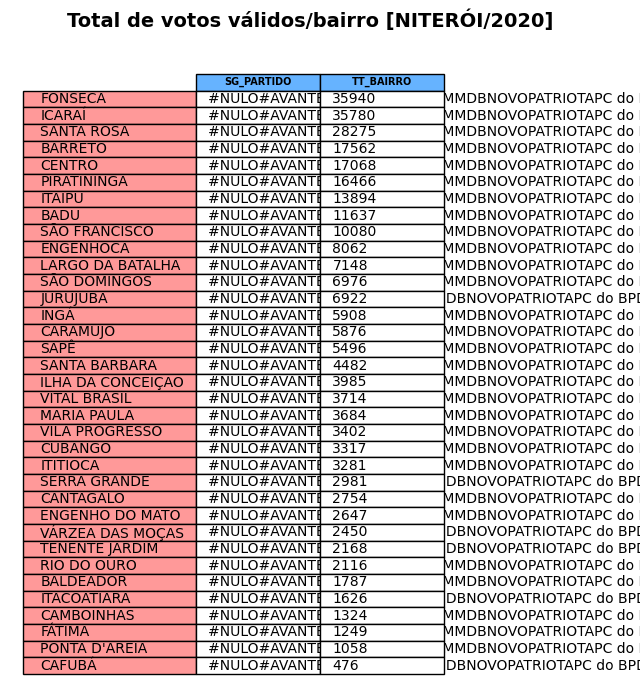

In [17]:
imgsimples(cepb, "eleitorestotais", f"Total de votos válidos/bairro [{cidade}/{ano}]")

In [18]:
# Continuando Numero de votos por Partido por Bairro (npb)

npbvar = pd.merge(npb, cepb, on='Bairro', how='left')
npb['QT_DO_TT'] =  npbvar['QT_VOTOS'] / npbvar['TT_BAIRRO'] * 100

In [19]:
npb.to_excel(f'partidosporbairro_{cidadenorm}.xlsx', index=False)
print(npb)

                     Bairro     SG_PARTIDO  QT_VOTOS  QT_DO_TT
0    0                 BADU         #NULO#      1123       NaN
1    1                 BADU         AVANTE       766       NaN
2    2                 BADU      CIDADANIA       508       NaN
3    3                 BADU             DC         8       NaN
4    4                 BADU            DEM       157       NaN
...                     ...            ...       ...       ...
1055 1055  VÁRZEA DAS MOÇAS            PTC        46       NaN
1056 1056  VÁRZEA DAS MOÇAS             PV       346       NaN
1057 1057  VÁRZEA DAS MOÇAS           REDE        11       NaN
1058 1058  VÁRZEA DAS MOÇAS   REPUBLICANOS        25       NaN
1059 1059  VÁRZEA DAS MOÇAS  SOLIDARIEDADE        39       NaN

[1060 rows x 4 columns]


In [20]:
# Groupby partido e bairro
parti_bairro  = vts[['SG_PARTIDO', 'Bairro' , 'QT_VOTOS']]
nbp = parti_bairro.groupby(['SG_PARTIDO', 'Bairro']).sum().reset_index()
nbp = nbp.groupby(level=0).apply(lambda x: x.sort_values(by='QT_VOTOS', ascending=False))

nbpvar = pd.merge(nbp, cepb, on='Bairro', how='left')
nbp['QT_DO_TT'] =  nbpvar['QT_VOTOS'] / nbpvar['TT_BAIRRO'] * 100
nbp = nbp.set_index('SG_PARTIDO')
nbp.to_excel(f'bairroporpartido_{cidadenorm}.xlsx', index=True)
print(nbp)

                    Bairro  QT_VOTOS  QT_DO_TT
SG_PARTIDO                                    
#NULO#                BADU      1123       NaN
#NULO#           BALDEADOR       219       NaN
#NULO#             BARRETO      2062       NaN
#NULO#              CAFUBÁ        53       NaN
#NULO#          CAMBOINHAS       125       NaN
...                    ...       ...       ...
UP            SÃO DOMINGOS        16       NaN
UP           SÃO FRANCISCO         5       NaN
UP          TENENTE JARDIM         1       NaN
UP          VILA PROGRESSO         3       NaN
UP            VITAL BRASIL         7       NaN

[1060 rows x 3 columns]


## Território/Candidato

In [21]:
# Candidatos desagregados

vtscand = vts[vts['NR_VOTAVEL'].astype(str).str.len() != 2] # Retira votos de legenda

vtscand['CD_VOTAVEL'] = vtscand['NR_VOTAVEL'].astype(str) + "_" + vtscand['NM_VOTAVEL'].astype(str)


ncb = vtscand[['CD_VOTAVEL', 'SG_PARTIDO', 'Bairro' , 'QT_VOTOS']]
ncb.head(10)

C:\Users\yanme\AppData\Local\Temp\ipykernel_4236\3321373820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vtscand['CD_VOTAVEL'] = vtscand['NR_VOTAVEL'].astype(str) + "_" + vtscand['NM_VOTAVEL'].astype(str)


,CD_VOTAVEL,SG_PARTIDO,Bairro,QT_VOTOS
803565,17000_FRED MARTINS,PSL,SANTA ROSA,2
803566,43000_ANA GUIMARÃES,PV,SANTA ROSA,1
803567,65133_PARACHOQUE,PC do B,SANTA ROSA,1
803568,50377_PAULA,PSOL,SANTA ROSA,1
803569,70123_PAULO VELASCO,AVANTE,SANTA ROSA,1
803570,45000_CASOTA,PSDB,SANTA ROSA,1
803571,50001_PAULO EDUARDO GOMES,PSOL,SANTA ROSA,8
803572,17700_FRANCISCO,PSL,SANTA ROSA,4
803574,23823_FAFA ARAUJO,CIDADANIA,SANTA ROSA,1
803575,65115_BETINHO IECIN,PC do B,SANTA ROSA,1


In [22]:
ncbvar = []
ncbvar = pd.merge(ncb, cepb, on='Bairro', how='left')
ncbvar.head()

,CD_VOTAVEL,SG_PARTIDO_x,Bairro,QT_VOTOS,SG_PARTIDO_y,TT_BAIRRO
0,17000_FRED MARTINS,PSL,SANTA ROSA,2,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275
1,43000_ANA GUIMARÃES,PV,SANTA ROSA,1,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275
2,65133_PARACHOQUE,PC do B,SANTA ROSA,1,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275
3,50377_PAULA,PSOL,SANTA ROSA,1,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275
4,70123_PAULO VELASCO,AVANTE,SANTA ROSA,1,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275


In [23]:
ncbvar['QT_DO_TT'] =  ncbvar['QT_VOTOS'] / ncbvar['TT_BAIRRO'] * 100
ncbvar['QT_DO_TT'].round(3)
ncbvar.head()

,CD_VOTAVEL,SG_PARTIDO_x,Bairro,QT_VOTOS,SG_PARTIDO_y,TT_BAIRRO,QT_DO_TT
0,17000_FRED MARTINS,PSL,SANTA ROSA,2,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275,0.007073
1,43000_ANA GUIMARÃES,PV,SANTA ROSA,1,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275,0.003537
2,65133_PARACHOQUE,PC do B,SANTA ROSA,1,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275,0.003537
3,50377_PAULA,PSOL,SANTA ROSA,1,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275,0.003537
4,70123_PAULO VELASCO,AVANTE,SANTA ROSA,1,#NULO#AVANTECIDADANIADCDEMMDBNOVOPATRIOTAPC do...,28275,0.003537


In [24]:
partidos = ncbvar['SG_PARTIDO'].unique()
for pt in partidos:
    var = ncbvar[ncbvar['SG_PARTIDO'] == f'{pt}']
    var = var.groupby(['CD_VOTAVEL', 'Bairro']).sum()
    pt = norm(pt)
    var.to_excel(f'{cidadenorm}/{cidadenorm}_{pt}_bairros.xlsx', index=True)

KeyError: 'SG_PARTIDO'

In [ ]:
'''vtscand = vts[vts['NR_VOTAVEL'].astype(str).str.len() != 2] # Retira votos de legenda

vtscand['CD_VOTAVEL'] = vtscand['NR_VOTAVEL'].astype(str) + "_" + vtscand['NM_VOTAVEL'].astype(str)


ncb = vtscand[['CD_VOTAVEL', 'SG_PARTIDO', 'Bairro' , 'QT_VOTOS']]

ncbvar['QT_DO_TT'] =  ncbvar['QT_VOTOS'] / ncbvar['TT_BAIRRO'] * 100
ncbvar['QT_DO_TT'].round(3)

partidos = ncbvar['SG_PARTIDO'].unique()
for pt in partidos:
    var = ncbvar[ncbvar['SG_PARTIDO'] == f'{pt}']
    var = var.groupby(['CD_VOTAVEL', 'Bairro']).sum()
    pt = norm(pt)
    var.to_excel(f'{cidadenorm}/{cidadenorm}_{pt}_bairros.xlsx', index=True)'''

In [ ]:

vts.head()

In [ ]:
'''test = geo('RUA ITAGUAI 173, SANTA ROSA - NITERÓI - RJ')'''
'''print(test)'''

In [ ]:
# Listando endereços e seus locais eleitorais

vts['end_completo'] = vts['Endereço do Local'] + ", " + vts['Bairro'] + " - " + vts['NM_MUNICIPIO'] + ' - ' + vts['SG_UF'] # criando uma string de end completo

end_comp = vts['end_completo'].unique()
ec = pd.DataFrame({'end': end_comp})
ec['latitude'] = np.nan
ec['longitude'] = np.nan

In [ ]:
'''### ESSE PEDAÇO TEM QUE SER OPTIMIZADO PARA NÃO TERMOS QUE CONSULTYAR O BD EXTERNO TODA VEZ, SÓ SE PODE FAZER 1500 CONSULTAS POR DIA!!!

for index, row in ec.iterrows(): #aplicando def geo e criando um xlsx pra salvar os endereços em lat log.
    end = row['end']
    endereco = geo(end)
    if ec.loc[index, 'latitude'] == np.nan: # eu imagino que isso seja muito feio, mas eu to com preguiça de pensar 
        ec.loc[index, 'latitude'] = endereco[0]
    else:
        pass
    ec.loc[index, 'longitude'] == np.nan:
        ec.loc[index, 'longitude'] = endereco[1]
    else:
        pass
ec.head()'''

In [ ]:

for index, row in ec.iterrows(): 
    end = row['end']
    endereco = geo(end)
    ec.loc[index, 'latitude'] = endereco[0]
    ec.loc[index, 'longitude'] = endereco[1]
ec.head()

In [ ]:
ec.to_excel(f'{cidadenorm}/latlog_{cidadenorm}.xlsx', index=False)

In [ ]:
ec.rename(columns={'end': 'end_completo'}, inplace=True) 
vts = pd.merge(vts, ec, on='end_completo', how='left')

vts.head()

In [ ]:
for pt in partidos:
    vtsvar = [vts['SG_PARTIDO'] == f'{pt}']
    pt = norm(pt)
    ncl = vtsvar[['end_completo', 'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS']]
    ncl['CD_VOTAVEL'] = ncl['NR_VOTAVEL'].astype(str) + "_" + ncl['NM_VOTAVEL']
    ncl = ncl.groupby(['CD_VOTAVEL', 'end_completo']).sum()
    ncl = ncl.reset_index()
    ncl = ncl.drop(['NR_VOTAVEL'], axis=1)
    ncl = pd.merge(ncl, ec, on='end_completo', how='left')
    ncl = ncl.set_index(['CD_VOTAVEL', 'end_completo'])
    ncl.to_excel(f'{cidadenorm}/ncl_{cidadenorm}_{pt}.xlsx', index=True)


In [ ]:


# Exemplo de dados com endereços, votos (valor numérico), latitude e longitude
data = {'endereco': ['Local 1', 'Local 2', 'Local 3', 'Local 4'],
        'votos': [1500, 2500, 1200, 3000],  # O número de votos (ou qualquer outro valor numérico)
        'latitude': [-22.8962026, -22.906847, -22.913885, -22.897042],
        'longitude': [-43.1019592, -43.172896, -43.209373, -43.183029]}

# Cria o DataFrame
df = pd.DataFrame(data)

# Cria o mapa centrado em uma localização aproximada (exemplo: Niterói, RJ)
m = folium.Map(location=[-22.9068, -43.1729], zoom_start=12)

# Prepara os dados para o HeatMap
# Os dados devem ser no formato: [[lat, lon, intensidade], ...]
heat_data = [[row['latitude'], row['longitude'], row['votos']] for index, row in df.iterrows()]

# Adiciona o HeatMap ao mapa
HeatMap(heat_data, radius=15).add_to(m)

# Salva o mapa em um arquivo HTML ou exibe no Jupyter Notebook
m.save("heatmap_votos.html")
m

In [ ]:
# Exibe o mapa
m.save("mapa_votos.html")  # Salva o mapa em um arquivo HTML
m

# RÚBRICA DOS PARTIDOS MUNICIPAIS
> Todos os dados de cada partido


In [ ]:
# df vazio e o index como os pártidos por sigla
partidos = votos['SG_PARTIDO'].unique()
rubpt = pd.DataFrame(index=partidos)
rubpt.head()

In [ ]:
# Quantos votos cada partido tem no total
vtptds = votos.groupby('SG_PARTIDO')['QT_VOTOS'].sum()
rubpt['VT_TOTAIS'] = vtptds
rubpt.head()

In [ ]:
# Qantidade de candidatos por partidos
qtcand = votos.groupby('SG_PARTIDO')['NM_VOTAVEL'].nunique()
rubpt['QT_CANDIDATOS'] = qtcand
rubpt.head()

In [ ]:
rubpt['EFICIENCIA_NOMINATA'] = rubpt['VT_TOTAIS'] / rubpt['QT_CANDIDATOS']
rubpt.head()

In [ ]:
# Vendo quais partidos tem maior penetração através da legenda e não em nome de um partido
qtnominata = votos.groupby('SG_PARTIDO')['DS_TIPO_VOTAVEL'].apply(lambda x:(x == 'Legenda').sum())
rubpt['VTS_LEGENDA'] = qtnominata
rubpt['PCTG_VTLEGENDA'] = (rubpt['VTS_LEGENDA'] / rubpt['VT_TOTAIS']) * 100
rubpt.head()

In [ ]:
# Totais. Note que a parte da eficiencia e porcentagem da legenda não significa.
qtstotais = rubpt.sum()
rubpt.loc['TOTAL PARTIDOS'] = qtstotais
rubpt.tail()

In [ ]:
# Médias totais. Eficiencie nominata e % legenda requerem que se "limpe" a rubrica dos nulos na contagem. Como não parece ser uma rúbrica importante, por hora vale a pena deixar de lado.  
mediatt = rubpt.mean()
rubpt.loc['MÉDIA PARTIDOS'] = mediatt
rubpt.tail()

In [ ]:
rubpt = rubpt.round(2)
print(rubpt)

In [ ]:
# Cria uma figura e um eixo
fig, ax = plt.subplots(figsize=(8, 4))  # Ajuste o tamanho conforme necessário

# Remove os eixos
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Adiciona a tabela ao gráfico
tbl = table(ax, rubpt, loc='center', cellLoc='left', colWidths=[0.2]*len(rubpt.columns))

# Ajusta o tamanho da fonte
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)

# Personaliza as cores
colors = {
    'index': '#ff9999',  # Cor do índice
    'header': '#66b3ff',  # Cor do cabeçalho
    'row_1': '#99ff99',   # Cor da penúltima linha
    'row_2': '#ffcc99'    # Cor da última linha
}

# Aplica a cor ao cabeçalho
for key, cell in tbl.get_celld().items():
    if key[0] == 0:  # Células do cabeçalho
        cell.set_text_props(weight='bold', fontsize='7')
        cell.set_facecolor(colors['header'])
    elif key[1] == -1:  # Células do índice
        cell.set_facecolor(colors['index'])
    elif key[0] == len(rubpt):  # Última linha
        cell.set_facecolor(colors['row_2'])
    elif key[0] == len(rubpt) - 1:  # Penúltima linha
        cell.set_facecolor(colors['row_1'])     


savename = cidade.replace(' ', '_')
# Salva a imagem
plt.savefig(f'partidos_{savename}.png', bbox_inches='tight', pad_inches=0.3)

# Exibe a imagem (opcional)
plt.show()